**Проект статистический анализ данных - Исследование поведения пользователей сервиса аренды самокатов**

### Описание проекта

В данной работе я выступаю аналитиком популярного сервиса аренды самокатов GoFast. У меня есть данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализирую данные и проверю некоторые гипотезы, которые могут помочь бизнесу вырасти.

Пользователи сервиса GoFast пользуются мобильным приложением:

- без подписки:
   - абонентская плата отсутствует;
   - стоимость одной минуты поездки — 8 рублей;
   - стоимость старта (начала поездки) — 50 рублей;
- с подпиской Ultra:
   - абонентская плата — 199 рублей в месяц;
   - стоимость одной минуты поездки — 6 рублей;
   - стоимость старта — бесплатно.

***Цель проекта***

Проанализировать данные (пользователи из нескольких городов, а также об их поездках) и проверить некоторые гипотезы, которые помогут сервису аренды самокатов GoFast вырасти.

### Описание данных



Пользователи — `users_go.csv`

- `user_id` - уникальный идентификатор пользователя
- `name` - имя пользователя
- `age` - возраст
- `city` - город
- `subscription_type` - тип подписки (free, ultra)

Поездки — `rides_go.csv`

- `user_id` - уникальный идентификатор пользователя
- `distance` - расстояние, которое пользователь проехал в текущей сессии (в метрах)
- `duration` - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
- `date` - дата совершения поездки

Подписки — `subscriptions_go.csv`

- `subscription_type` - тип подписки
- `minute_price` - стоимость одной минуты поездки по данной подписке
- `start_ride_price` - стоимость начала поездки
- `subscription_fee` - стоимость ежемесячного платеж

### План работы


1. Загрузка данных
2. Предобработка данных
3. Исследовательский анализ данных
4. Объединение данных
5. Подсчёт выручки
6. Проверка гипотез

### Загрузка и изучение данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from scipy.stats import binom

In [2]:
users_go = pd.read_csv('users_go.csv')
rides_go = pd.read_csv('rides_go.csv')
sub_go = pd.read_csv('subscriptions_go.csv')

In [3]:
users_go.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [4]:
rides_go.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [5]:
sub_go.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


После предварительного просмотра данных узнаю общую информацию о датафреймах:

In [6]:
users_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [7]:
rides_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [8]:
sub_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 196.0+ bytes


В таблицах `users_go` и `sub_go` пропусков нет, типы данных корректны. В таблице `rides_go` пропусков тоже нет, но тип данных стобца `date` тип object, а должен быть datetime. Наименование стобцов соотвествует синтаксису Python и стилистически корректно.

Проверю наличие дубликатов:

In [9]:
users_go.duplicated().sum()

31

In [10]:
rides_go.duplicated().sum()

0

In [11]:
sub_go.duplicated().sum()

0

Отлично в таблицах `rides_go` и `sub_go` нет явных дубликатов, а в таблице `users_go` всего 31. Избавимся от дубликатов на этапе предобработки данных. Там же опционально при необходимости проверю наличие неявных дубликатов.

Теперь построю гистограммы для таблицы с целью проверки качества данных:

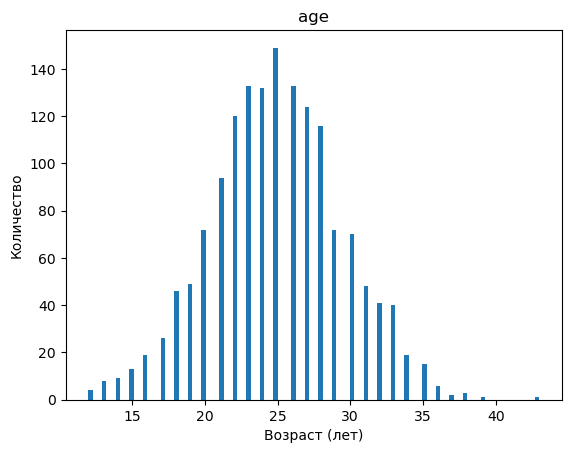

In [12]:
plt.hist(users_go['age'], bins=100)
plt.title('age')
plt.xlabel('Возраст (лет)')
plt.ylabel('Количество')
plt.show()

Отлично, выбросов не видно. Гистограмма соотвествует нормальному распределению.

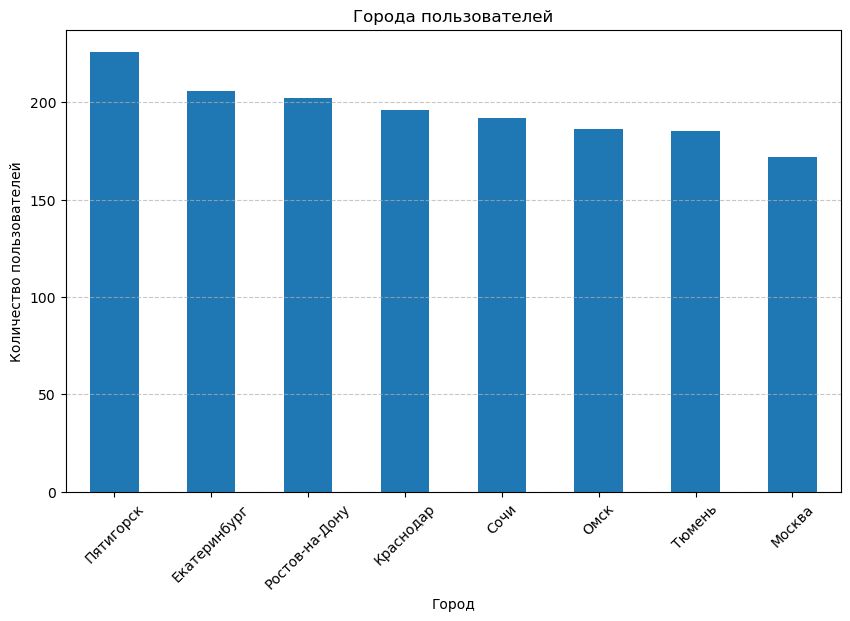

In [13]:
plt.figure(figsize=(10, 6))
users_go['city'].value_counts().plot(kind='bar')
plt.title('Города пользователей')
plt.xlabel('Город')
plt.ylabel('Количество пользователей')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Отлично, по городам аномальных значений не наблюдается. 

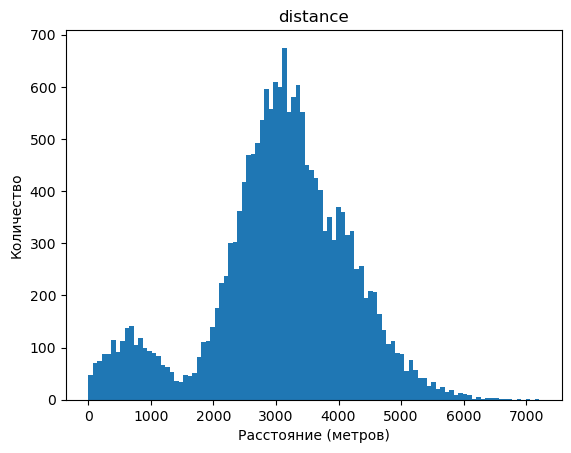

In [14]:
plt.hist(rides_go['distance'], bins=100)
plt.title('distance')
plt.xlabel('Расстояние (метров)')
plt.ylabel('Количество')
plt.show()

Отлично, наблюдаю также нормальное распределение, кроме увелечения колличества пользователей проехавших до 1000 метров. Эти данные проанализирую на этапе исследовательского анализа.

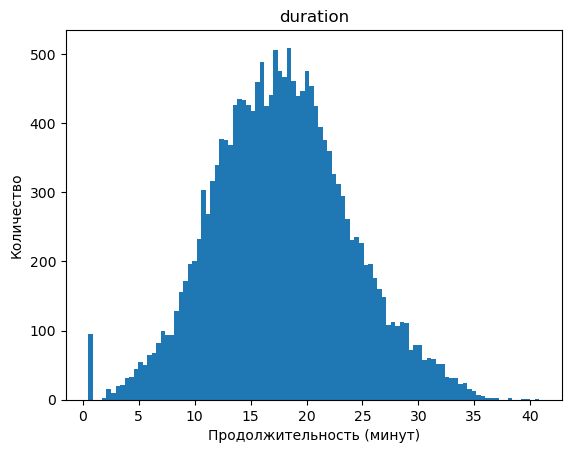

In [15]:
plt.hist(rides_go['duration'], bins=100)
plt.title('duration')
plt.xlabel('Продолжительность (минут)')
plt.ylabel('Количество')
plt.show()

С данным по столбцу длительность тоже все в порядке. Вызывает вопрос большое колличество пользователей с длительностью сессии около минуты. Вернусь к этому позднее.

***Вывод***

Во всех таблицах нет пропусков, явных дубликатов всего 31 и они содержаться в `users_go`. Названия столбцов корректны, типы данных тоже в порядке, за исключением столбца `date` в `rides_go`. По гистограммам аномалий не видно. В целом данные пригодны для анализа, но необходимо исправить две проблемв, озвученные ранее. Могу предположить, что данные проблемы возникли во время выгрузки/загрузки данных. 

### Предобработка данных

Начну с удаления дубликатов

In [16]:
users_go.duplicated().sum()

31

In [17]:
users_go = users_go.drop_duplicates()

In [18]:
users_go.duplicated().sum()

0

Теперь приведу данные в столбце `date` таблицы `rides_go` к корректному типу datetime

In [19]:
rides_go['date']

0        2021-01-01
1        2021-01-18
2        2021-04-20
3        2021-08-11
4        2021-08-28
            ...    
18063    2021-11-04
18064    2021-11-16
18065    2021-11-18
18066    2021-11-27
18067    2021-12-29
Name: date, Length: 18068, dtype: object

In [20]:
rides_go['date'] = pd.to_datetime(rides_go['date'])

Добавлю столбец с месяцем, который понадобится на этапе подсчета выручки:

In [21]:
rides_go['month'] = rides_go['date'].dt.month

Также для удобства дальнейшей работы округлю значения в столбце `distance` до двух знаков. Данные в стобце `duration`округлю до большего и переведу в тип int

In [22]:
rides_go['distance'] = rides_go['distance'].round(2)
rides_go['duration'] = np.ceil(rides_go['duration']).astype('int')

In [23]:
rides_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  int32         
 3   date      18068 non-null  datetime64[ns]
 4   month     18068 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(1)
memory usage: 564.8 KB


Отлично, типы данных для всех стобцов корректны.

***Вывод***

Я избавилась от дубликатов и привела тип данных к корректному. А так же для двух столбцов выполнила округление для комфортной работы в дальнейшем. Данные можно признать качественными и пригодными для провередения анализа. А так же добавила новый столбец, который потребуется позднее.

### Исследовательский анализ данных

На данном этапе необходимо описать и визуализировать общую информацию о пользователях и поездках:
1. частота встречаемости городов;
2. соотношение пользователей с подпиской и без подписки;
3. возраст пользователей;
4. расстояние, которое пользователь преодолел за одну поездку;
5. продолжительность поездок.

#### Частота встречаемости городов

Найду количество пользователей по городам

In [24]:
users_go.pivot_table(index='city', values='user_id', aggfunc='count').sort_values(by='user_id', ascending=False)

,user_id
city,
Пятигорск,219
Екатеринбург,204
Ростов-на-Дону,198
Краснодар,193
Сочи,189
Омск,183
Тюмень,180
Москва,168


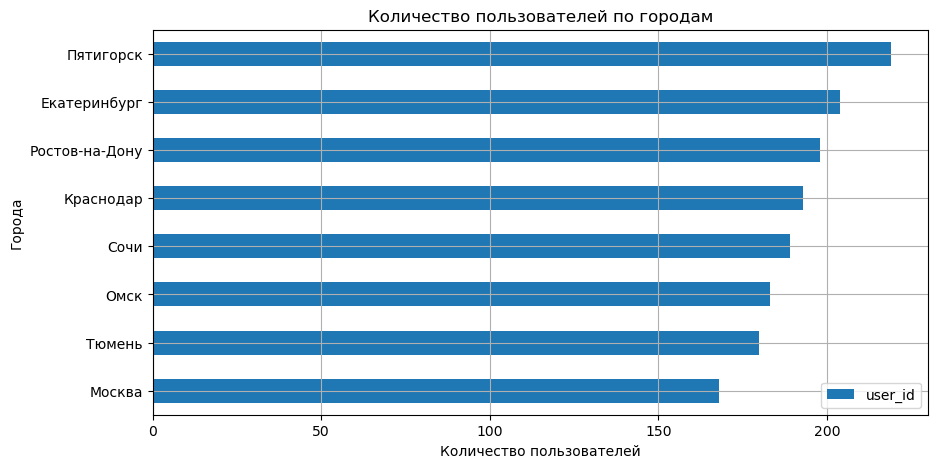

In [25]:
(
    users_go.pivot_table(index='city', values='user_id', aggfunc='count').sort_values(by='user_id', ascending=True)
    .plot(kind='barh', grid=True, figsize=(10, 5))
)
plt.title('Количество пользователей по городам')
plt.ylabel('Города')
plt.xlabel('Количество пользователей')

plt.show()

Больше всего пользователей в Пятигорске, Екатеринбурге и Ростове-на-Дону. В первой половине преобладают более южные города. Это можно объяснить более долгим прокатным сезоном. Исключение Екатеринбург, это можно объяснить высокой плотностью населения.

#### Соотношение пользователей с подпиской и без подписки

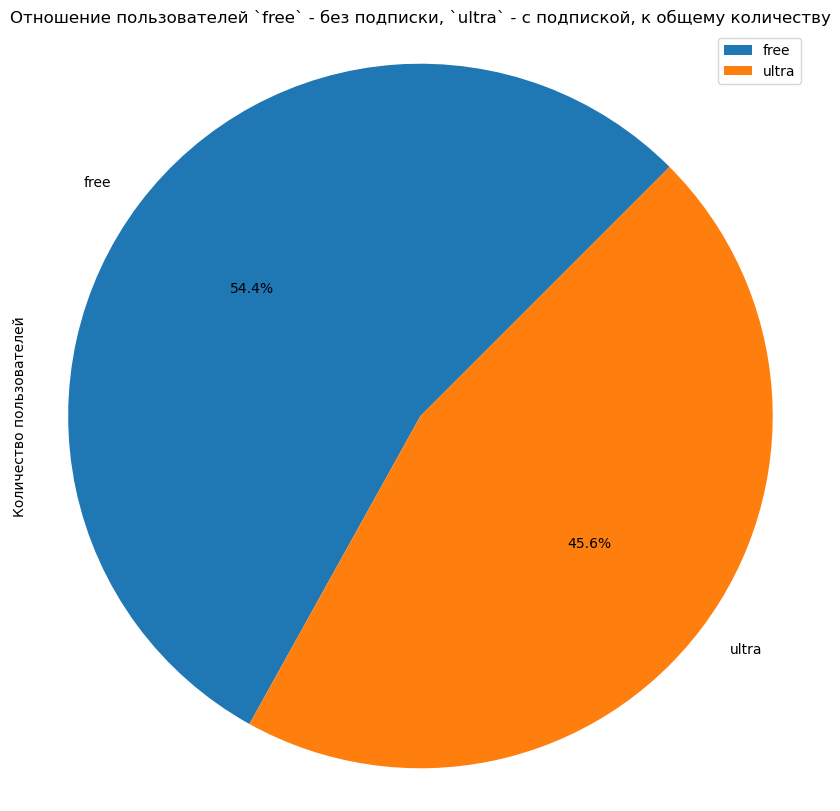

In [26]:
(
    users_go.pivot_table(index='subscription_type', values='user_id', aggfunc='count')
    .plot.pie(y='user_id', figsize=(10,10),  label='Количество пользователей', 
    autopct='%1.1f%%', startangle=45, #выводим с одним знаком после запятой и начинаем с угла 45 градусов по часовой стрелке от положительного направления оси x.
    title='Отношение пользователей `free` - без подписки, `ultra` - с подпиской, к общему количеству')

)
plt.axis('equal') #для того, чтобы диаграмма была круглой
plt.show()

Колличество пользователей без подписки привышает количество с подпиской на 8,8%

#### Возраст пользователей

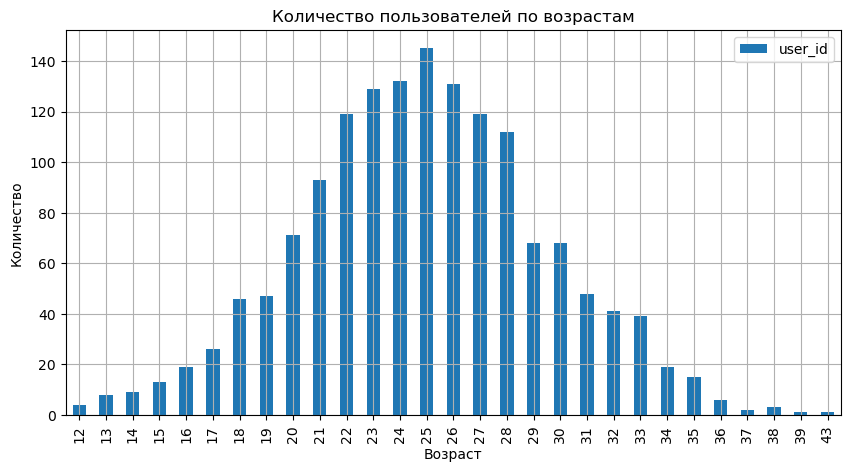

In [27]:
(
    users_go.pivot_table(index='age', values='user_id', aggfunc='count').sort_values(by='age', ascending=True)
    .plot(kind='bar' , grid=True, figsize=(10, 5))
)
plt.title('Количество пользователей по возрастам')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.show()

In [28]:
users_go['age'].mean().round(1)

24.9

In [29]:
users_go['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

Количества пользователей в зависимости от возраста указывает, что средний возраст потребителя услуги подчиняется нормальному распределению с медианой примерно в 25 лет, при этом средний возраст и медиана практически совпадают. Удивляет, что минимальный возраст 12 и 13, и таких пользователей хоть и не много, но они есть. Не уверена что это корректные данные, так как для регистрации на сервисе, возможно, нужен паспорт, а паспорт получают в 14. Если паспорт не нужен, то не понятно как происходит сбор данных. Ведь если попросить людей просто указать возвраст, то есть высокий риск получения не правдоподобной статистики.

#### Расстояние, которое пользователь преодолел за одну поездку

In [30]:
rides_go['distance'].describe()

count    18068.000000
mean      3070.659992
std       1116.831222
min          0.860000
25%       2543.227500
50%       3133.610000
75%       3776.220000
max       7211.010000
Name: distance, dtype: float64

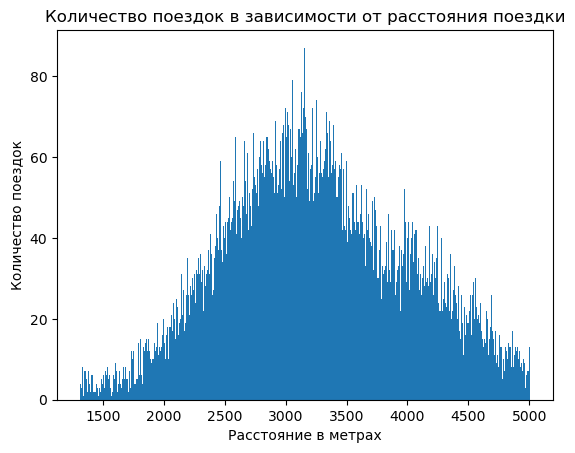

In [31]:
plt.hist(rides_go['distance'], bins=500, range=(1310,5009))
plt.title('Количество поездок в зависимости от расстояния поездки')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество поездок')
plt.show()

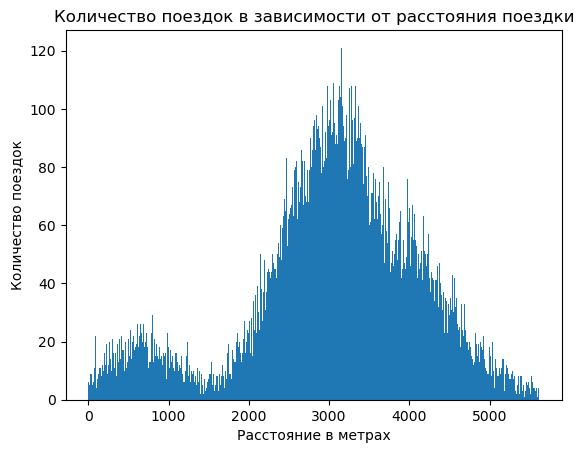

In [32]:
plt.hist(rides_go['distance'], bins=500, range=(1,5620))
plt.title('Количество поездок в зависимости от расстояния поездки')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество поездок')
plt.show()

Визуализация количества поездок в зависимости от расстояния показывает, что медианное значение длины поездок составляет 3133 метра, а первый квартиль находится на уровне 2543 метра, а третий квартиль - на уровне 3776 метров. При построении гистограммы с диапазоном (1310, 5009) отчетливо видно нормальное распределение зависимости. Однако, если увеличить диапазон до (1, 5620), то становится заметным второй пик на уровне 700 метров. Хотя этот пик не вписывается в основное распределение, его присутствие следует учитывать.

#### Продолжительность поездок

In [33]:
rides_go['duration'].describe()

count    18068.000000
mean        18.303520
std          6.094928
min          1.000000
25%         14.000000
50%         18.000000
75%         22.000000
max         41.000000
Name: duration, dtype: float64

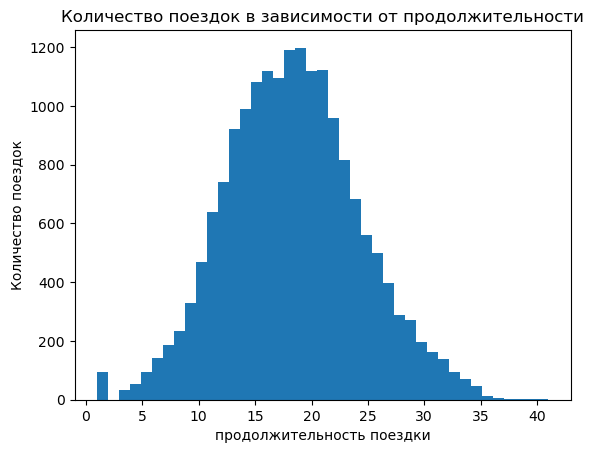

In [34]:
plt.hist(rides_go['duration'], bins=41, range=(1,41))
plt.title('Количество поездок в зависимости от продолжительности')
plt.xlabel('продолжительность поездки')
plt.ylabel('Количество поездок')
plt.show()

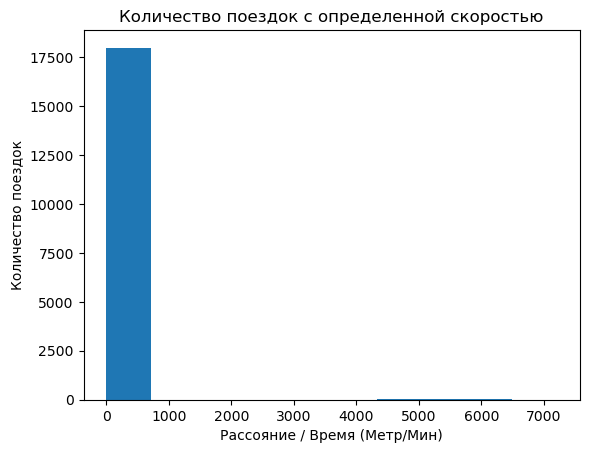

In [35]:
plt.hist(rides_go['distance'] / rides_go['duration'])
plt.title('Количество поездок с определенной скоростью')
plt.xlabel('Рассояние / Время (Метр/Мин)')
plt.ylabel('Количество поездок')
plt.show()

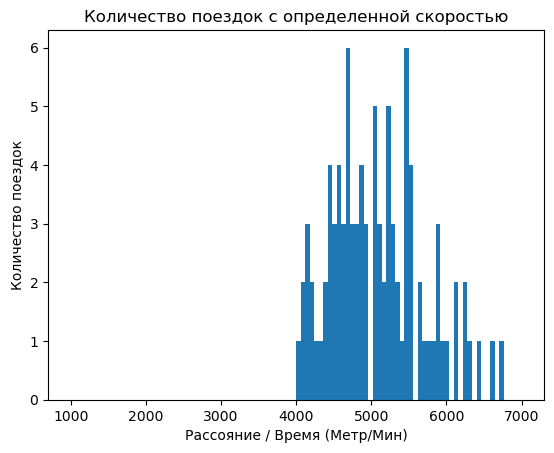

In [36]:
plt.hist(rides_go['distance'] / rides_go['duration'], bins=100, range=(1000,7000))
plt.title('Количество поездок с определенной скоростью')
plt.xlabel('Рассояние / Время (Метр/Мин)')
plt.ylabel('Количество поездок')
plt.show()

In [37]:
(rides_go['distance'] / rides_go['duration']).max()

7211.01

Визуализация количества поездок в зависимости от продолжительности указывает на следующие статистические характеристики: медианное значение времени поездки составляет 18 минут, первый квартиль находится на уровне 14 минут, а третий квартиль - на уровне 22 минут. На гистограмме отчетливо видно наличие аномально коротких времен поездок, порядка 100 случаев с временем менее 1 минуты. Это указывает на наличие аномалий в данных по времени поездок.

Также стоит отметить, что расчет средней скорости перемещения показывает, что в некоторых случаях средняя скорость самокатов составляла от 4000 до 7211,01 метра в минуту, что практически невозможно. Эти аномалии следует сообщить владельцам проката для дальнейшего анализа и устранения. Пока что мы оставим такие значения без изменений.

***Вывод***

Услугами сервиса аренды самокатов пользуются преимущественно в южных городах, где сезон проката обычно длится дольше. Однако, на втором месте оказался уральский город Екатеринбург, что может быть интересным наблюдением для анализа спроса в регионах с различным климатом.

Анализ количества пользователей показывает, что 54.4% пользователей не имеют подписки, что превышает количество пользователей с подпиской Ultra, составляющих 45.6%.

Распределение количества пользователей в зависимости от возраста демонстрирует нормальное распределение с медианным возрастом около 25 лет, что говорит о том, что услуга популярна среди молодежи.

Анализ количества поездок в зависимости от расстояния показывает, что медианное значение составляет 3133 метра, при этом замечен второй пик на 700 метрах. Это указывает на наличие аномалий в данных, которые следует учитывать при дальнейшем анализе.

Визуализация количества поездок в зависимости от продолжительности подтверждает наличие аномалий в данных, таких как поездки с аномально коротким временем, менее 1 минуты. Также выявлены случаи, когда средняя скорость перемещения самокатов была неправдоподобно высокой, что требует дополнительного внимания и, возможно, корректировки данных.

### Объединение данных

In [38]:
merged_df = users_go.merge(rides_go, on='user_id').merge(sub_go, on='subscription_type')

In [39]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  int32         
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int32         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(5), object(3)
memory usage: 1.5+ MB


Созданный датафрейм объединяющий таблицы  `rides_go `,  `users_go `,  `subscriptions_go ` в своем составе имеет 18068 строк во всех столбцах, что соответствует исходной таблице rides_go и указывает на отсутствие пропусков в столбцах. Объединение прошло успешно

#### Создам еще два датафрема:

Для пользователей без подписки:

In [40]:
free_df = merged_df[merged_df['subscription_type'] == 'free']

In [41]:
free_df.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.69,15,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.93,17,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.43,21,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.91,10,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.38,18,2021-02-14,2,8,50,0


Для пользователей с подпиской:

In [42]:
ultra_df = merged_df[merged_df['subscription_type'] == 'ultra']

In [43]:
ultra_df.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.92,26,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.59,16,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.16,7,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.78,19,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.69,27,2021-08-28,8,6,0,199


Отлично теперь у меня есть данные о каждой категории пользователей.

#### Визуализирую информацию о расстоянии и времени поездок для пользователей обеих категорий

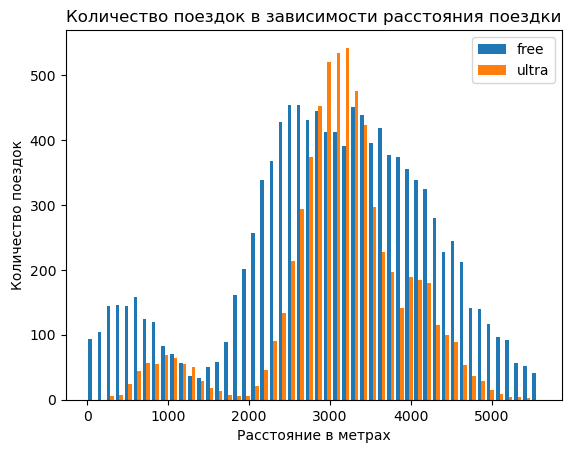

In [44]:
plt.hist([free_df['distance'], ultra_df['distance']], bins=50, range=(1,5600), label=['free', 'ultra'])
plt.legend(loc='upper right')
plt.title('Количество поездок в зависимости расстояния поездки')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество поездок')
plt.show()

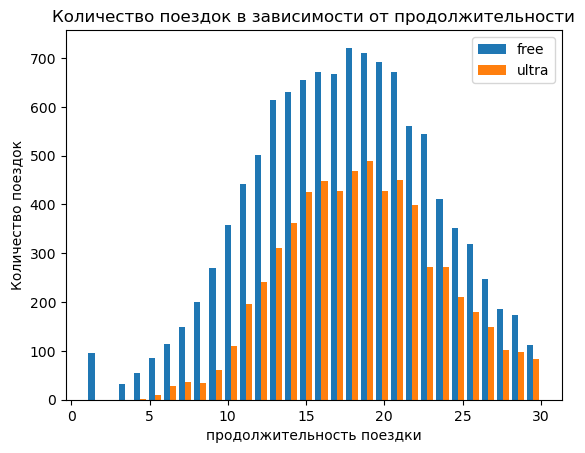

In [45]:
plt.hist([free_df['duration'], ultra_df['duration']], bins=30, range=(1,30), label=['free', 'ultra'])
plt.legend(loc='upper right')
plt.title('Количество поездок в зависимости от продолжительности')
plt.xlabel('продолжительность поездки')
plt.ylabel('Количество поездок')
plt.show()

In [46]:
(free_df[
    ['distance',
     'duration']].describe()
)

,distance,duration
count,11568.000000,11568.000000
mean,3045.495284,17.890992
std,1246.173810,6.330250
min,0.860000,1.000000
25%,2366.560000,13.000000
50%,3114.650000,18.000000
75%,3905.695000,22.000000
max,7211.010000,35.000000


In [47]:
(ultra_df[
    ['distance',
     'duration']].describe()
)

,distance,duration
count,6500.000000,6500.000000
mean,3115.445431,19.037692
std,836.895369,5.577439
min,244.210000,4.000000
25%,2785.447500,15.000000
50%,3148.640000,19.000000
75%,3560.577500,22.000000
max,5699.770000,41.000000


***Вывод***

Визуализация созданных датафреймов зависимости количества поездок на определенное расстояние и описательная статистика (.describe()) по пользователям без подписки free и с подпиской ultra указывает, что подписка влияет на медианные значения (расстояния поезки без подписки 3114.65 метров с подпиской 3148.64 метров), при этом заметно что у пользователей с подпиской меньший разброс ( видно из графиков и по стандартному отклонению free - 1246,17 ultra - 836.89), также заметно смешение центра дополнительного пика с 500 метров (free) до 1000 (ultra).

Визуализация созданных датафреймов зависимости количества поездок за определенное время и описательная статистика (.describe()) по пользователям без подписки free и с подпиской ultra указывает, что подписка влияет на медианные значения (время поезки без подписки 18 мин с подпиской 19 мин), так же замечено снижение стандартного отклонения free - 6.33 ultra - 5.57. Подписка влияет на расстояние поездок и на время в пути

### Подсчёт выручки

Cоздадам датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найду суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц

In [48]:
grouped_df = merged_df.groupby(['subscription_type', 'month', 'user_id'], as_index=False)
#Группировка данных по типу подписки, месяцу и пользователю

In [49]:
# Вычисление суммарного расстояния, количества поездок и суммарного времени для каждого пользователя за каждый месяц
aggregated_df = grouped_df.agg({
    'distance': 'sum',
    'user_id': 'count',
    'duration': 'sum',
    'minute_price': 'first',  # Добавляем стоимость одной минуты поездки (цену из первой строки группы)
    'start_ride_price': 'first',  # Добавляем стоимость старта поездки (цену из первой строки группы)
    'subscription_fee': 'first'  # Добавляем стоимость подписки (цену из первой строки группы)
}).reset_index()

In [50]:
# Вычисление помесячной выручки для каждого пользователя
def calculate_monthly_revenue(row):
    start_ride_price = row['start_ride_price']
    minute_price = row['minute_price']
    duration = row['duration']
    subscription_fee = row['subscription_fee']
    revenue = start_ride_price * row['user_id']  # Стоимость старта поездки умножается на количество поездок
    revenue += minute_price * duration  # Стоимость одной минуты поездки умножается на общую продолжительность всех поездок
    revenue += subscription_fee  # Плюс стоимость подписки
    return revenue

In [51]:
aggregated_df['monthly_revenue'] = aggregated_df.apply(calculate_monthly_revenue, axis=1)

In [52]:
aggregated_df.head()

,index,subscription_type,month,distance,user_id,duration,minute_price,start_ride_price,subscription_fee,monthly_revenue
0,0,free,1,2515.69,1,15,8,50,0,170
1,1,free,1,2676.47,1,18,8,50,0,194
2,2,free,1,903.86,1,16,8,50,0,178
3,3,free,1,3406.58,1,24,8,50,0,242
4,4,free,1,3197.14,1,18,8,50,0,194


***Вывод***

Создала новый датафрейм с агрегированными данными (aggregated_df) на основе датафрейма с объединенными данными (merged_df).

Нашла суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц. Также добавили столбец с помесячной выручкой, которую принес каждый пользователь.

### Проверка гипотез

**Определю, тратят ли пользователи с подпиской больше времени на поездки**

Если да, то пользователи с подпиской могут быть «выгоднее» для компании.

Сформулиру гипотезы:

 - Н0: Средняя продолжительность поездок с подпиской ultra и без free равна
 - Н1: Средняя продолжительность поездок с подпиской ultra больше продолжительности поездок без подписок free


Проверю гипотезы, используем исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

In [53]:
alpha = 0.05
results = st.ttest_ind(
    ultra_df['duration'], 
    free_df['duration'], 
    equal_var=True, 
    alternative='greater')
results.pvalue

2.4959453720736625e-34

Нулевая гипотеза отвергнута, есть основания утверждать, что средняя продолжительность поездки с подпиской больше продолжительности поездок без подписки при установленном уровне значимости в 5 %

**Оптимальное растояние поездки с точки зрения износа самоката для пользователей с подпиской**

Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката.

Установлю действительно ли, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?

Выдвину гипотезы:

 - Н0: Среднее расстояние поездок с подпиской ultra равно оптимальному расстоянию в 3130 метров.
 - Н1: Среднее расстояние поездок с подпиской ultra больше оптимального в 3130 метров.


Проверим гипотезы, используем исходные данные о расстоянии в для подписчиков.

In [54]:
distance = 3130
alpha = 0.05

results = st.ttest_1samp(
    ultra_df['distance'], 
    distance,
    alternative='greater')

results.pvalue

0.9195362605842414

Нулевую гипотезу неудалось отвергнуть и следовательно, есть основания утверждать, что среднее расстояние поездки, пользователей с подпиской, не превышает оптимальное расстоянием в 3130 метров с точки зрения износа самоката, при установленном уровне значимости в 5 %

**Определю, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.**

Выдвину гипотезы:

 - Н0: Помесячная средняя выручка от пользователей с подпиской равна помесячной средней выручке от пользователей без подписки.
 - Н1: Помесячная средняя выручка от пользователей с подпиской больше помесячной средней выручки от пользователей без подписки.


Проверим гипотезы, используем данные о выручке с подпиской и без подписки.

In [55]:
alpha = 0.05
results = st.ttest_ind(
    aggregated_df.loc[aggregated_df['subscription_type'] == 'ultra', 'monthly_revenue'], 
    aggregated_df.loc[aggregated_df['subscription_type'] == 'free', 'monthly_revenue'], 
    equal_var=True, 
    alternative='greater')
results.pvalue

1.8850394384715216e-31

Результат p-value, который получен (1.8850394384715216e-31), гораздо меньше заданного уровня значимости alpha (0.05). Это означает, что у нас есть достаточно сильные доказательства против нулевой гипотезы (H0) в пользу альтернативной гипотезы (H1).

Отвергаем нулевую гипотезу о том, что помесячная средняя выручка от пользователей с подпиской равна помесячной средней выручке от пользователей без подписки. Вместо этого мы принимаем альтернативную гипотезу о том, что помесячная средняя выручка от пользователей с подпиской больше, чем от пользователей без подписки.

**Какой тест нужен для проверки гипотезы о снижении количества обращений в техподдержку после обновления серверов?**

Необходимо использовать гипотезу о равенстве средних для зависимых (парных) выборок.

Гипотезы будут сформулированы так:

H0 : μ1 = μ2
H1 : μ1 != μ2
где μ1 и μ2 - средние значения количество обращений в техподдержку до и после изменения.

Метод, который нужно использовать при сравнении: `scipy.stats.ttest_rel()`

### Итоговый вывод

В данной работе были рассмотрены три датафрейма: в первом содержались данный о пользователях, во втором о поездах, а в третьем о подписах.
    Ни в одном датафреме не оказалось пропусков. Дубликаты были выявлены и удалены в датафреме, соджержащим информацию о пользователях. Кроме того, был выявлен и изменен некорректный тип данных в таблице, содержащей информацию о поездах. В эту таблицу также добавила столбец с номером месяца из даты. Также были приведи к более удобному для работы формату данные из столбцов с длительностью сессии и расстоянием поездки. 
    Благодаря исследовательскому анализу, можно сделать вывод, что самые популярные города для аренды самокатов - это южные города, исключением явялется Екатеринбург. Возможно, он оказался в выборке из-за высокой плотности населения. Самой многочисленной категорией пользователей, являются молодые люди около 25 лет, что удивительно, есть пользователи младше 14 лет. Пользователей без подписки больше почти на 9%, что можно объяснить тем, что большенство пользователей пользуются арендой для коротких поездко длительностью около 15 минут. Что интересно, есть группа пользователей, которая пользуется арендой для очень коротких поездок меньше 1 км. 
    Также было выявлено, что пользователи с подпиской приносят компании более высокую выручку, нежели пользователи без подписки, несмотря на то, что их меньше.
    Руководству сервиса желательно принять меры для перехода клиентов на подписку!